In [2]:
#load library(S) when needed
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Electric_Production.csv', parse_dates=True)

In [4]:
data.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [6]:
data.isna().sum()

DATE     0
Value    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [8]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    397 non-null    datetime64[ns]
 1   Value   397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [10]:
data['year'] = pd.DatetimeIndex(data['DATE']).year
data['month'] = pd.DatetimeIndex(data['DATE']).month

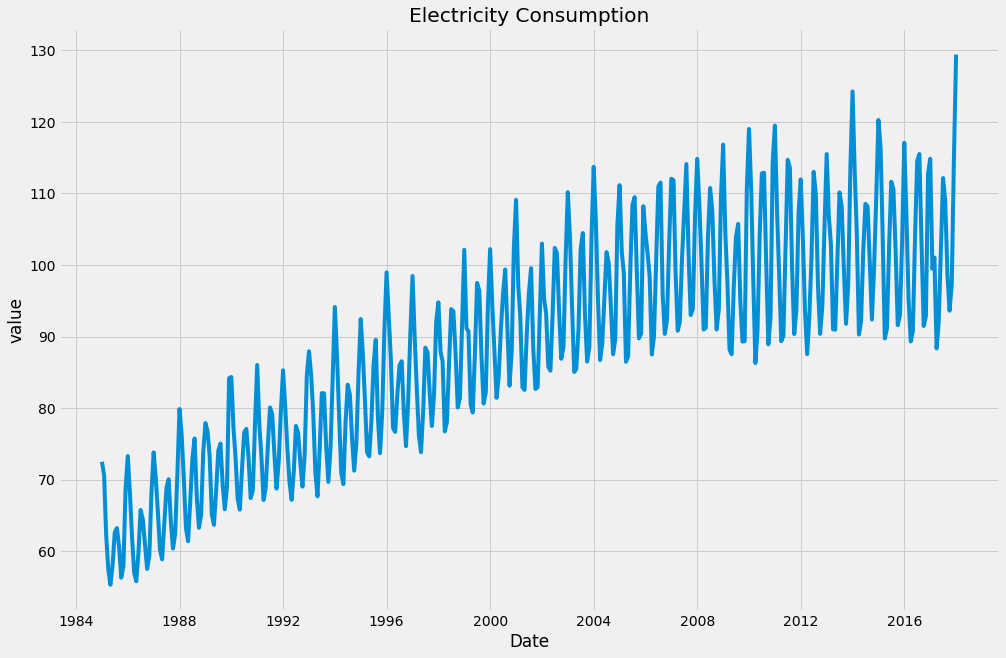

In [11]:
plt.xlabel('Date')
plt.ylabel('value')
plt.title('Electricity Consumption')
plt.plot(data['DATE'], data['Value'])

The above graph signifies an upward trend

In [12]:
import seaborn as sns
sns.set()

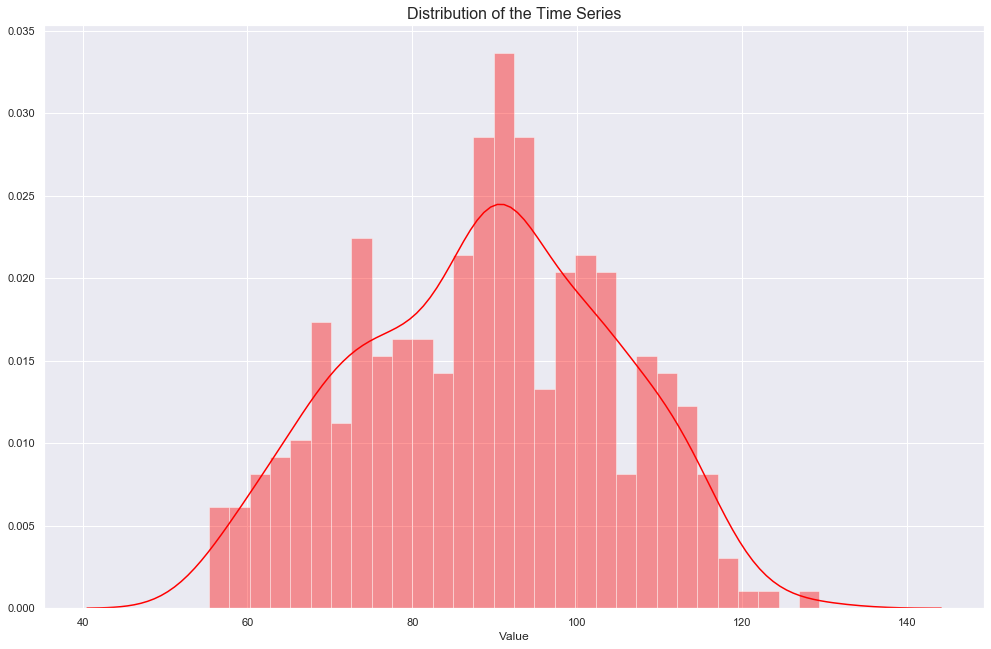

In [13]:
sns.distplot(data['Value'], kde = True, color ='red', bins = 30)
plt.title('Distribution of the Time Series', fontsize=16)
plt.show()

The distribution seems fairly normally shaped

In [14]:
data.head(20)

,DATE,Value,year,month
0,1985-01-01,72.5052,1985,1
1,1985-02-01,70.6720,1985,2
2,1985-03-01,62.4502,1985,3
3,1985-04-01,57.4714,1985,4
4,1985-05-01,55.3151,1985,5
5,1985-06-01,58.0904,1985,6
6,1985-07-01,62.6202,1985,7
7,1985-08-01,63.2485,1985,8
8,1985-09-01,60.5846,1985,9
9,1985-10-01,56.3154,1985,10


In [15]:
import matplotlib as mpl

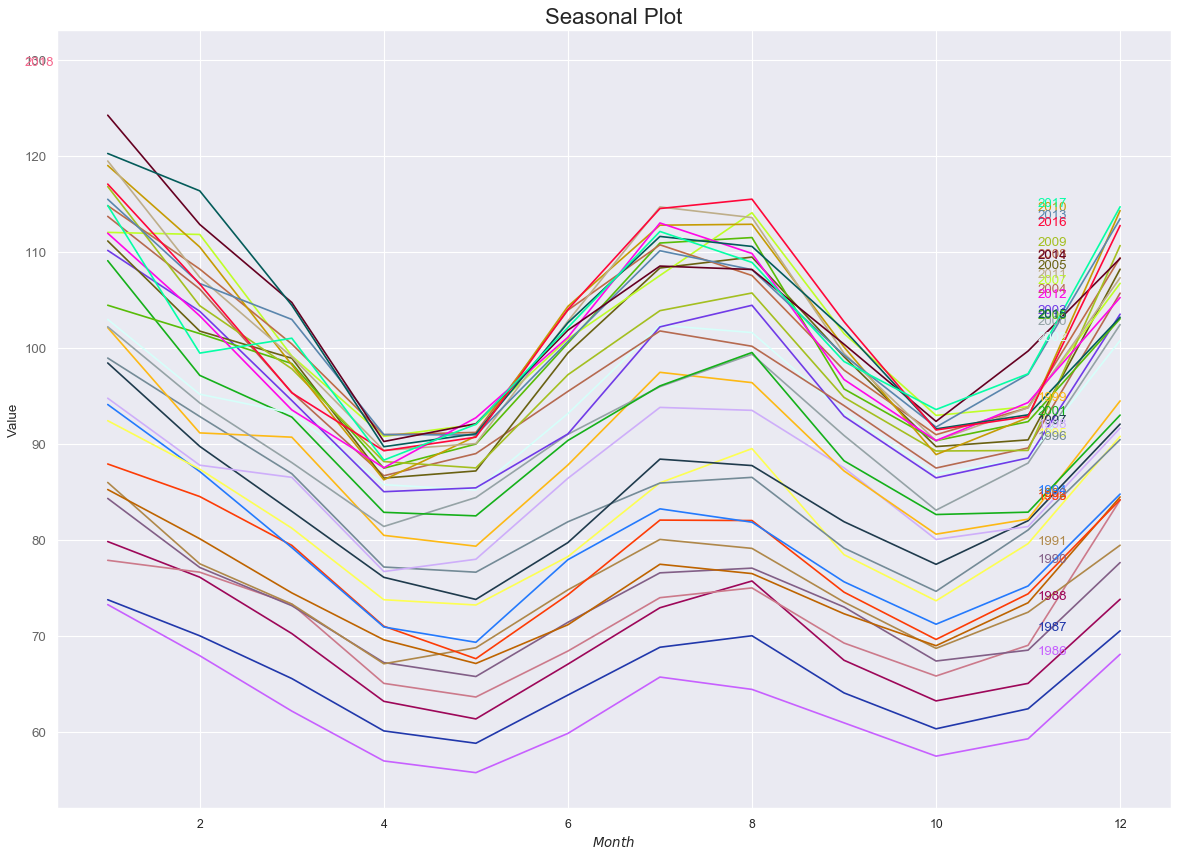

In [16]:
#CHECK FOR SEASONALITY
# Prepare data
#data['year'] = [d.year for d in data['DATE']]
#data['month'] = [d.strftime('%b') for d in data['DATE']]
years = data['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Value', data=data.loc[data.year==y, :], color=mycolors[i], label=y)
        plt.text(data.loc[data.year==y, :].shape[0]-.9, data.loc[data.year==y, 'Value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel= 'Value', xlabel = '$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot", fontsize=20)
plt.show()

There appears to be a seasonal occurence, with a period of 12(1 year)

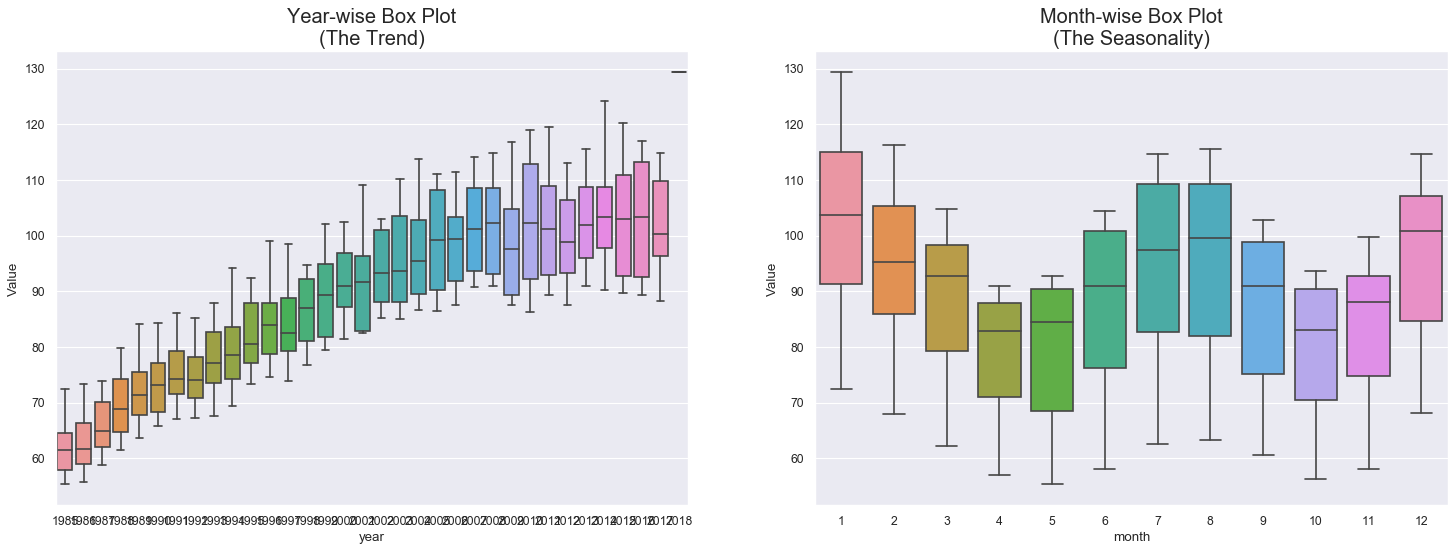

In [17]:
#This will further prove the yearly seasonality and the upward trend

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Value', data=data, ax=axes[0])
sns.boxplot(x='month', y='Value', data=data.loc[~data.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

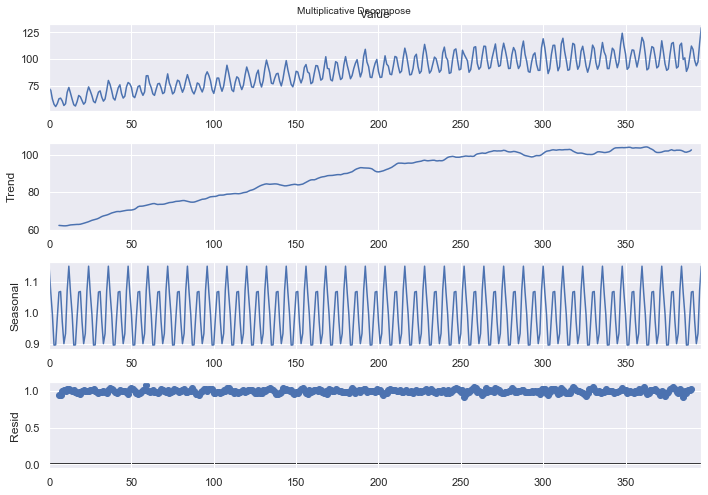

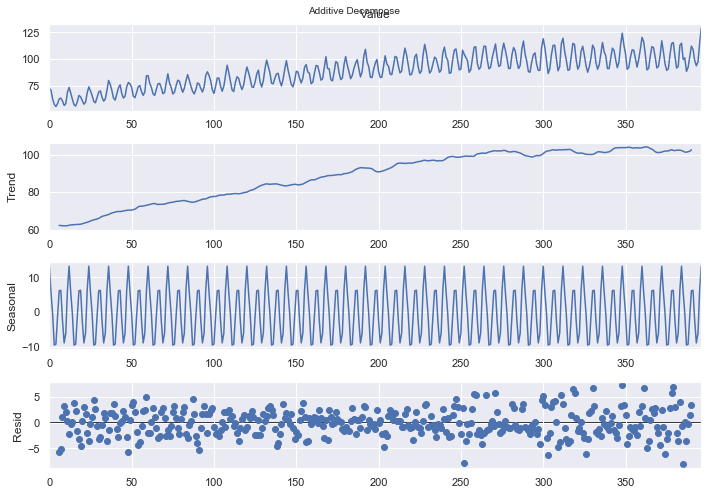

In [19]:
#decompose series in order to begin stationarization
result_mul = seasonal_decompose(data['Value'], model='multiplicative', period=12)

result_add = seasonal_decompose(data['Value'], model='additive', period=12)

plt.rcParams.update({'figure.figsize' : (10,7)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=10)
result_add.plot().suptitle('Additive Decompose', fontsize=10)
plt.show()

In [20]:
data_reconstruct = pd.concat([result_mul.seasonal, result_mul.resid, result_mul.trend, result_mul.observed], axis=1)
data_reconstruct.columns = ['season', 'resid', 'trend', 'actual_values']
data_reconstruct.head(10)

,season,resid,trend,actual_values
0,1.149172,NaN,NaN,72.5052
1,1.065875,NaN,NaN,70.6720
2,0.995985,NaN,NaN,62.4502
3,0.896027,NaN,NaN,57.4714
4,0.896724,NaN,NaN,55.3151
5,0.984900,NaN,NaN,58.0904
6,1.066145,0.944310,62.199021,62.6202
7,1.068081,0.953259,62.120496,63.2485
8,0.971682,1.005664,61.999112,60.5846
9,0.900691,1.008929,61.971337,56.3154


the dataframe proves the time series is multiplication; meaning seasonality is highly dependent on the trend.

In [21]:
from statsmodels.tsa.stattools import adfuller #to confirm non stationarity

In [22]:
results = adfuller(data['Value'], autolag='AIC')
print(f'ADF Statistic: {results[0]}')
print(f'p-value: {results[1]}')
for key, value in results[4].items():
    print('Critical Values: ')
    print(f' {key}, {value}')

ADF Statistic: -2.2569903500472503
p-value: 0.1862146911658658
Critical Values: 
 1%, -3.4476305904172904
Critical Values: 
 5%, -2.869155980820355
Critical Values: 
 10%, -2.570827146203181


Since the p-value is less than 0.05, we fail to accept the null hypothesis which states that the time series is stationary

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #to determine order of AR, MA and I

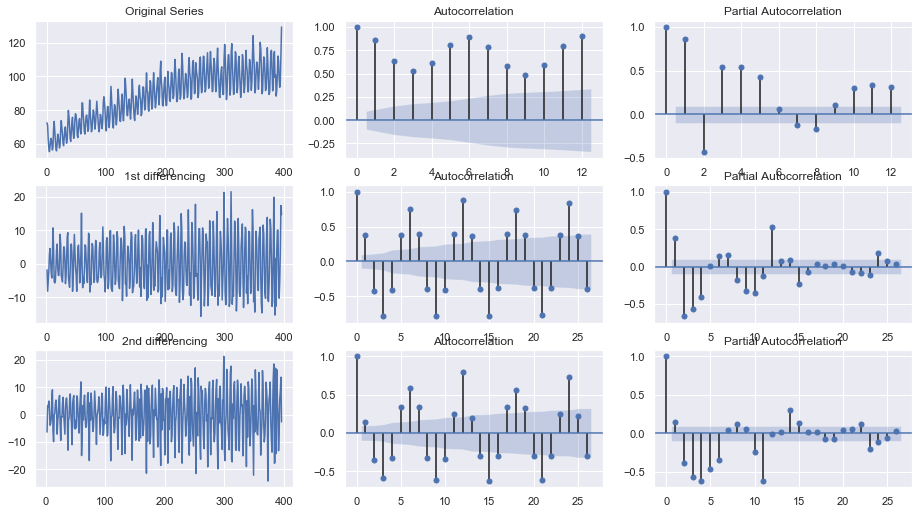

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(14, 8))
axes[0,0].plot(data['Value']); axes[0,0].set_title('Original Series')
plot_acf(data['Value'],ax=axes[0,1], lags=12)
plot_pacf(data['Value'], ax=axes[0,2], lags=12)

axes[1,0].plot(data['Value'].diff()); axes[1,0].set_title('1st differencing')
plot_acf(data['Value'].diff().dropna(), ax=axes[1,1])
plot_pacf(data['Value'].diff().dropna(), ax=axes[1,2])

axes[2,0].plot(data['Value'].diff().diff()); axes[2,0].set_title('2nd differencing')
plot_acf(data['Value'].diff().diff().dropna(), ax=axes[2,1])
plot_pacf(data['Value'].diff().diff().dropna(), ax=axes[2,2])

plt.show()

In [25]:
result = adfuller(data['Value'].diff().dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key , value in result[4].items():
    print(f'Critical Values:')
    print(f' {key}, {value}')

ADF Statistic: -7.104890882267306
p-value: 4.0777865655396034e-10
Critical Values:
 1%, -3.4476305904172904
Critical Values:
 5%, -2.869155980820355
Critical Values:
 10%, -2.570827146203181


The series appears stationary after 1st differencing which means our I = 1

In [45]:
for key, value in result[4].items():
    if value < 0:
        print(key)

1%
5%
10%


In [26]:
len(data)

397

In [27]:
data.shape

(397, 4)

In [28]:
train_pct = 0.7
train_size = int(len(data) * train_pct)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:]

In [29]:
len(test['Value'])

120

# Modelling

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX #Seasonal-ARIMA will be used considering that this is a seasonal series
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

In [31]:
#function to select optimal SARIMAX model
def optimize_SARIMA(param_list, d, D, s, exog):
    results = []
    for param in tqdm_notebook(param_list):
        try:
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
    
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)|(P,Q)', 'AIC']
    
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [32]:
#creating range of values to pass into SARIMAX model
p = range(0, 3, 1)
d = 2
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 2
Q = range(0, 3, 1)
s = 12
parameters = product(p, q, P, Q)
param_list = list(parameters)
print(len(param_list))

81


In [33]:
result_df = optimize_SARIMA(param_list, 2,2,12, data['Value'])
result_df

,"(p,q)|(P,Q)",AIC
0,"(2, 2, 2, 2)",1795.414908
1,"(2, 2, 0, 2)",1802.724047
2,"(2, 1, 2, 2)",1829.722306
3,"(0, 2, 2, 2)",1832.066963
4,"(2, 1, 1, 2)",1834.730188
...,...,...
76,"(2, 0, 0, 0)",2421.566117
77,"(0, 0, 1, 0)",2498.430879
78,"(1, 0, 0, 0)",2539.642141
79,"(0, 0, 0, 0)",2628.082216


In [65]:
data1 = data.drop(['year', 'month'], axis=1)
data1.set_index('DATE')
data1.set_index('DATE')

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [66]:
best_model = SARIMAX(data['Value'], order=(0,1,2), seasonal_order=(2,1,2,12)).fit(dis=-1)
print(best_model.summary()) #to derive equation

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -882.160
Date:                            Mon, 07 Jun 2021   AIC                           1778.320
Time:                                    15:23:06   BIC                           1805.974
Sample:                                         0   HQIC                          1789.289
                                            - 397                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4649      0.041    -11.278      0.000      -0.546      -0.384
ma.L2         -0.3907      0.043   

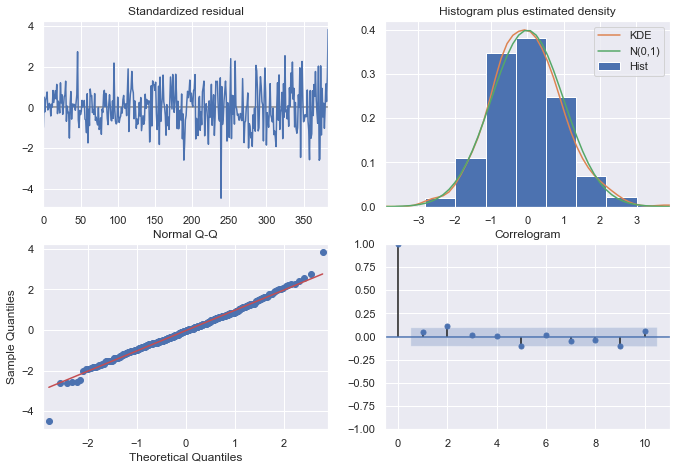

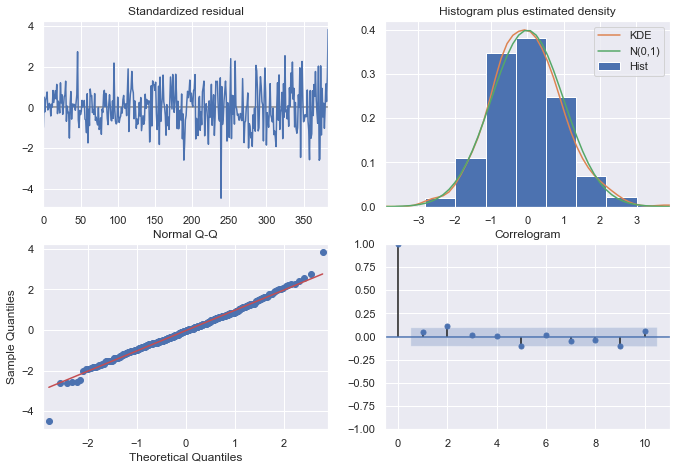

In [67]:
#now to study the residuals i.e. actual - predicted
best_model.plot_diagnostics()

The Q-Q graph is almost a complete straight line; meaning the residual is not so much.  Also, the correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise.

In [69]:
bm = best_model.predict(start=397, end=469) #72 months
bm

397    113.321513
398    104.008736
399     91.406697
400     93.711105
401    103.886604
          ...    
465     96.663451
466    100.286896
467    114.886077
468    125.817705
469    113.687909
Length: 73, dtype: float64

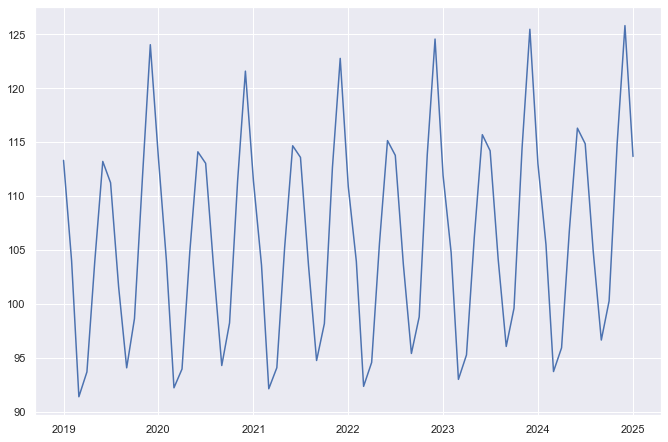

In [78]:
plt.plot(pd.date_range('2019-01-01', '2025-01-01', freq='MS'), bm)

In [80]:
import pickle

In [82]:
#to save model
filename = 'best_model.sav'
pickle.dump(bm, open(filename, 'wb'))

In [83]:
#to load the model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

397    113.321513
398    104.008736
399     91.406697
400     93.711105
401    103.886604
          ...    
465     96.663451
466    100.286896
467    114.886077
468    125.817705
469    113.687909
Length: 73, dtype: float64